In [12]:
import scipy
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')


from sklearn.model_selection import cross_val_score

In [2]:
raw_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')
raw_data.shape

(20052, 680)

In [3]:
df = raw_data.dropna()
df.shape

(15864, 680)

In [4]:
df['above_average'] = df.rating > 4

c:\users\wscott\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [5]:
print(df['above_average'].describe())

df = df.drop(['rating', 'title'], axis = 1)

count     15864
unique        2
top        True
freq       8658
Name: above_average, dtype: object


In [6]:
#Sums up columns so we know which tags are the most common
col_counts = df.sum(axis = 0, skipna = True)

#Creates a list of the top columns to use on the dataset 
top_30 = (col_counts[col_counts > 1500])
col_list = list(top_30.index.values)

df = df[col_list]
df.head()

,calories,protein,fat,sodium,bake,bon appétit,dairy free,dessert,dinner,fall,...,soy free,sugar conscious,summer,tomato,tree nut free,vegetable,vegetarian,wheat/gluten-free,winter,above_average
0,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,False
1,403.0,18.0,23.0,1439.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,True
2,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,False
4,547.0,20.0,32.0,452.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,False
5,948.0,19.0,79.0,1042.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,True


In [15]:
list(top_30.index.values)

['calories',
 'protein',
 'fat',
 'sodium',
 'bake',
 'bon appétit',
 'dairy free',
 'dessert',
 'dinner',
 'fall',
 'fruit',
 'gourmet',
 'kidney friendly',
 'kosher',
 'milk/cream',
 'no sugar added',
 'onion',
 'peanut free',
 'pescatarian',
 'quick & easy',
 'sauté',
 'side',
 'soy free',
 'sugar conscious',
 'summer',
 'tomato',
 'tree nut free',
 'vegetable',
 'vegetarian',
 'wheat/gluten-free',
 'winter',
 'above_average']

In [7]:
trainsize = int(df.shape[0] / 2)

df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['above_average'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['above_average'])]


Y_test = df_test['above_average'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['above_average'])]

In [8]:
import datetime
from sklearn.svm import SVC

print('Starting Now...')

currentDT = datetime.datetime.now()
print (str(currentDT))


svm = SVC(kernel = 'rbf')
svm.fit(X_train, Y_train)

Starting Now...
2019-05-13 20:26:33.332351


c:\users\wscott\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\wscott\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [10]:
svm.score(X_train, Y_train)

0.9774331820474029

In [13]:
cross_val_score(svm, X_train, Y_train, cv=5)

c:\users\wscott\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\wscott\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\wscott\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\wscott\appdata\local\programs\python\python37\lib\site-packages\

array([0.58879093, 0.57566204, 0.57881463, 0.57755359, 0.57692308])

In [18]:
Y = df['above_average'].values.reshape(-1, 1)
X = df.drop('above_average', axis=1)

In [19]:
cross_val_score(svm, X, Y, cv=5)

c:\users\wscott\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\wscott\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\wscott\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\wscott\appdata\local\programs\python\python37\lib\site-packages\

array([0.61058601, 0.60447526, 0.61203908, 0.61223203, 0.61506936])

TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

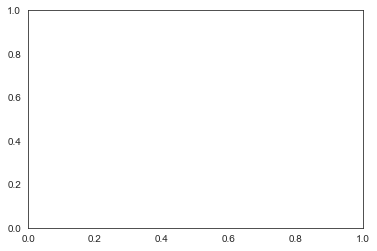

In [21]:
df.above_average.hist()
plt.title('Histogram of Recipe Ratings')
plt.show()

In [137]:
X_train.head()

,calories,protein,fat,sodium,bake,bon appétit,dairy free,dessert,dinner,fall,...,side,soy free,sugar conscious,summer,tomato,tree nut free,vegetable,vegetarian,wheat/gluten-free,winter
0,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,403.0,18.0,23.0,1439.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,547.0,20.0,32.0,452.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5,948.0,19.0,79.0,1042.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [138]:
lass = linear_model.Lasso(alpha=10)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

R² for the model with few features:
0.0002597330685771837

Parameter estimates for the model with few features:
[-9.00156571e-09  9.40124859e-07 -0.00000000e+00  1.76886755e-08
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  5.48344722e-01]


In [142]:
from sklearn.svm import SVR
svr = SVR()
X = df.drop('above_average', 1).sample(frac=0.3, replace=True, random_state=1)
Y = df.above_average.sample(frac=0.3, replace=True, random_state=1)
svr.fit(X,Y)

c:\users\wscott\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [143]:
svr.score(X, Y)

0.9456466097112045

In [144]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

c:\users\wscott\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\wscott\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\wscott\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", Futu

array([0.23051898, 0.23426767, 0.19120998, 0.22246577, 0.21891523])

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel = 'linear')
X = df.drop('above_average', 1)#.sample(frac=0.3, replace=True, random_state=1)
Y = df.above_average#.sample(frac=0.3, replace=True, random_state=1)
svc.fit(X,Y)

In [ ]:
svc.score(X, Y)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(svc, X, Y, cv=5)